In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

## Geometry, consumption  parameters

In [2]:
avo = 6.022e23   #avo's number
m2µm  = 1e6      #convert meters from/to micrometer

## Geometry (cylindrical):  Surface area, volume, cross-sectional area

def surf_a(d, l):               # Surface area
    return np.pi *  d  * l
def vol(d , l ):                # Volume
    return np.pi*l*(d/2)**2
def cross_a(d):
    return np.pi *  (d/2)**2

## Base consumption density, per volume and per surface-area

base_cyt = 10432667.412756/((3.1e-16 )*avo)   #moles ATP /sec per m^3 
base_mem = 909175.81/((5.68e-10 )*avo)      #moles ATP /sec per m^2

## Total base consumption 
def base_cons(volume, sarea , bc=base_cyt, bm = base_mem ):
    return bc*volume + bm * sarea

## Firing Rate , EFR
f_rate = np.arange(1,100,10)



## ATP Diffusion coefficient (highest end)
DATP = 300  ## µm^2/s


## Dimension ranges for axons(uniform, i.e. a particular d and l define the diameter and length along the whole axon)
d_range = np.arange(0.1,1,0.1)  # diameters in µm
l_range  = np.arange(1,10,0.1)  # length from mito midpoint to midpoint b/w  mito

X = np.copy(d_range)
Y = np.copy(l_range)
X, Y = np.meshgrid(d_range, l_range)




In [3]:
#  What are our parameters? 
#  - Length and Width
#  - Firing Rate    ( 1 to 100)
#  - Steady State ADP in bouton 1  for steady state ADP < rest ADP

#  What are some pitfalls/caps?
#  - 2x ATP consumption ≤ max ATP production (literature  max prod cap)
# production caps (not pro-rated, straight from previous )

In [4]:
## Production caps

#V_mito = lambda d: 4*np.pi/3*(d/2)**3

In [5]:
#mito_vmM = np.array([V_mito(0.13/m2µm),V_mito(0.3/m2µm)])

#60.3*.195*1.06*mito_vmM/(vol(1/m2µm,np.array([float(l_range[0])/m2µm ,float(l_range[-1])/m2µm  ]  )  ) )

### ATP Drop
$$
\text{Total Areal Consumption for a compartment} = C^{SA} \times \text{Surface Area} 
$$

In [6]:
Z = base_cons(vol( X/m2µm , Y/m2µm )  ,  surf_a( X/m2µm , Y/m2µm ))
print (min(Z[0]), max(Z[0] ) ,min(Z[-1]), max(Z[-1]))

print(base_cons(vol( d_range[-1]/m2µm , l_range[-1]/m2µm )  ,  surf_a( d_range[-1]/m2µm , l_range[-1]/m2µm )) )

1.273960051396744e-21 4.306769333444254e-20 1.2612204508827774e-20 4.2637016401098146e-19
4.2637016401098146e-19


In [7]:
np.shape(Y)

(90, 9)

In [8]:
def plot_surface(x,y,z,x_ti,y_ti,z_ti,ax_d = 13):
    ax = plt.figure().add_subplot(1, 1, 1, projection='3d')
    surf = ax.plot_surface(x,y,z, linewidth=0, antialiased=True)
    ax.set_xlabel(x_ti)
    ax.set_ylabel(y_ti)
    ax.set_zlabel(z_ti)
    ax.dist = ax_d
    plt.show()
    return None

# Good first - add contours of single lines for fixed diameters

## Base ATP consumption through varying Diameters and Lengths

C:\Users\ssempertegui2016\AppData\Local\Temp\ipykernel_32456\4071131718.py:7: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = ax_d


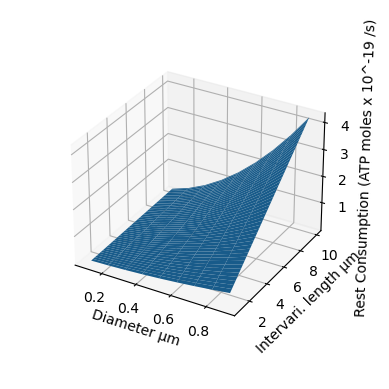

In [9]:
Z = base_cons(vol( X/m2µm , Y/m2µm )  ,  surf_a( X/m2µm , Y/m2µm ))
x_T, y_T, z_T  = 'Diameter µm' , 'Intervari. length µm' , 'Rest Consumption (ATP moles x 10^-19 /s)'
plot_surface(X,Y,Z,x_T, y_T, z_T)
plt.show()

C:\Users\ssempertegui2016\AppData\Local\Temp\ipykernel_32456\4071131718.py:7: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = ax_d


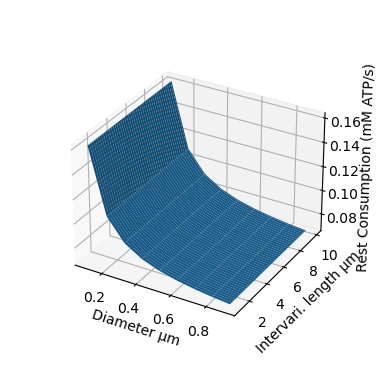

0.16220563158511747


In [10]:
Z = base_cons(vol( X/m2µm , Y/m2µm )  ,  surf_a( X/m2µm , Y/m2µm ))/vol( X/m2µm , Y/m2µm )
x_T, y_T, z_T  = 'Diameter µm' , 'Intervari. length µm' , 'Rest Consumption (mM ATP/s)'
plot_surface(X,Y,Z,x_T, y_T, z_T)

print(max(Z[-1]))
plt.show()


## Consumption estimates for activity:  https://www.jneurosci.org/content/42/6/954/tab-figures-data

Fig 3 (F) == Power ATP molecules per sec Ca2+
Fig 4 (F) == Power ATP molecules per sec Na+

comitted_ca and committed_na are ATP molecules per Action Potential
Power demand taken from supple tables, ATP molecules per sec


$$
\begin{align}
MN    &&  \text{ATP molecules/s for Ca2+} &&  \text{for Na+} && \text{Surface Area } µm^2 \\
M6Ib  &&  6.82E7  && 6.49E7 && 5.68E-10 \\
M6Is  &&  0.33E7 && 0.3E7 && 2.34E-10 \\
M13Ib  &&  9.97E7 && 12.1E7 && 5.43E-10 \\
M13Is  &&  0.31E7 && 0.32E7 && 2.51E-10 \\
M12Ib  &&  8.46E7 && 7.93E7 && 5.95E-10 \\
M12Is  &&  0.49E7 && 0.37E7 && 2.95E-10 \\
\end{align}
$$



In [11]:
##  'power_XX' refers to the ATP consumption density.  'SA' is molecules of ATP consumed per second.  
## 'vol' is due to vesicle processes  

terms = {
    "M61b" : {'power_sa': (6.82e7+6.49e7)/avo ,'power_vol': 2.27e7 /avo ,'area':5.68e-10 , 'volume':3.1e-16 },\
    'M61s':  {'power_sa': (0.33e7+0.3e7)/avo  ,'power_vol': 0.29e7 /avo  ,'area':2.34e-10 , 'volume':9.01e-17 }, \
    'M131b': {'power_sa': (9.97e7+12.1e7)/avo ,'power_vol': 2.4e7  /avo ,'area':5.43e-10 , 'volume':3.92e-16 } 
            } 

In [12]:
cSA=np.mean([terms['M61b']['power_sa']/terms['M61b']['area']/18,\
 terms['M61s']['power_sa']/terms['M61s']['area']/2,\
 terms['M131b']['power_sa']/terms['M131b']['area']/34])/2

print(cSA)
# #np.mean
# ([terms['M61b']['power_vol']/terms['M61b']['volume']/1,\
#  terms['M61s']['power_vol']/terms['M61s']['volume']/1,\
#  terms['M131b']['power_vol']/terms['M131b']['volume']/1])

1.0637166789598187e-08


In [13]:
# fig = plt.figure(figsize=plt.figaspect(0.45))
# ax1 = fig.add_subplot(1,2,1, projection ='3d')
# ax2= fig.add_subplot(1,2,2,projection='3d')


# ZA = terms['M61b']['power_sa']*surf_a(X/m2µm,Y/m2µm)/terms['M61b']['area']/1
# surf = ax1.plot_surface(X, Y, ZA, linewidth=0, antialiased=True)
# ZA2 = terms['M61s']['power_sa']*surf_a(X/m2µm,Y/m2µm)/terms['M61s']['area']
# surf = ax1.plot_surface(X, Y, ZA2, linewidth=0, antialiased=True)
# ax1.set_xlabel('Diameter µm')
# ax1.set_ylabel('Compartment length µm')
# ax1.set_zlabel('Surf_area Consumption (ATP moles x 10^-17 /s)')

# ax2= fig.add_subplot(1,2,2,projection='3d')
# ZV = terms['M61b']['power_vol']*vol(X/m2µm,Y/m2µm)/terms['M61b']['volume']/1
# surf = ax2.plot_surface(X, Y, ZV, linewidth=0, antialiased=True)
# Z2V = terms['M61s']['power_vol']*vol(X/m2µm,Y/m2µm)/terms['M61s']['volume']
# surf = ax2.plot_surface(X, Y, Z2V, linewidth=0, antialiased=True)
# ax2.set_xlabel('Diameter µm')
# ax2.set_ylabel('Compartment length µm')
# ax2.set_zlabel('Volume Consumption (ATP moles x 10^-18 /s)')
# ax2.dist = 13
# plt.show()

In [14]:
## Note that consumption C is for ONE compartment, so once you have your consumptions over the whole ofthe axon, cut it appropriately

In [15]:
#  Quantifying largest consumptions in terms  of mM/s, presuming 
#the  largest consumptions come from the thinnest and longest axons

# print('Largest (areal consumption, volumic consumption: ', '\n',(max(ZA[-1])/vol( min(d_range)/m2µm , max(l_range)/m2µm   ), \
# max(ZV[-1])/vol(     min(d_range)/m2µm  ,  max(l_range)/m2µm   ) ),  str('mM/s'))

### ATP Drops for 100 Hz firing M6Ib, compartment 2 has calcium active through the whole axon (over-rep'd consumption)

In [16]:

# ## Applying a EFR of 100 on the M6Ib-type ATP cost
# ATP_drop = (ZA+ZV)*(Y/2/m2µm)/(2*np.pi*(DATP/(m2µm)**2 )*(X/m2µm)**2/4)

# #plot_surface(X,Y,)


# #Just firing
# ax1 = plt.figure().add_subplot(1, 1, 1, projection='3d')
# ATP_drop = (ZA+ZV)*(Y/2/m2µm)/(2*np.pi*(DATP/(m2µm)**2 )*(X/m2µm)**2/4)
# ATP_drop_base = (base_cons(vol(X/m2µm,Y/m2µm), surf_a(X/m2µm,Y/m2µm)))*(Y/m2µm)/(2*np.pi*(DATP/(m2µm)**2 )*(X/m2µm)**2/4)
# surf1 = ax1.plot_surface(X, Y,ATP_drop*100/18, linewidth=0, antialiased=True)
# ax1.set_xlabel('Diameter µm')
# ax1.set_ylabel('Compartment length µm')
# ax1.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
# ax1.dist = 13
# plt.show()

# #Firing consumption + Base consumption
# ax2 = plt.figure().add_subplot(1, 1, 1, projection='3d')
# surf2 = ax2.plot_surface(X, Y,ATP_drop*100/18+ATP_drop_base, linewidth=0, antialiased=True)
# ax2.set_xlabel('Diameter µm')
# ax2.set_ylabel('Compartment length µm')
# ax2.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
# ax2.dist = 13
# plt.show()

# #Base consumption
# ax3 = plt.figure().add_subplot(1, 1, 1, projection='3d')
# surf3 = ax3.plot_surface(X, Y,ATP_drop_base, linewidth=0, antialiased=True)
# ax3.set_xlabel('Diameter µm')
# ax3.set_ylabel('Compartment length µm')
# ax3.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
# ax3.dist = 13
# plt.show()

In [17]:
# (100/18)*ATP_drop[-1] , ATP_drop_base[-1]

In [18]:
def beta(ADP_1,PhT=7.5+3.3,AdT=2.18,KPh=39.6):
    return KPh*AdT*PhT/((AdT + (KPh - 1)*ADP_1)**2)

In [19]:
beta(.1)

25.556510679356162

In [20]:
# ax = plt.figure().add_subplot(1, 1, 1, projection='3d')

# Ph_ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP+beta(0.02)*450)/(m2µm)**2 )*(X/m2µm)**2/4)
# ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP)/(m2µm)**2 )*(X/m2µm)**2/4)

# surf1 = ax.plot_surface(X, Y,Ph_ATP_drop*100/18, linewidth=0, antialiased=True)
# surf2 = ax.plot_surface(X, Y,ATP_drop*100/18, linewidth=0, antialiased=True, alpha =0.4)

# ax.set_xlabel('Diameter µm')
# ax.set_ylabel('Compartment length µm')
# ax.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
# ax.dist = 13
# plt.show()

In [21]:
# ## Trying different ADP_1 values

# ax = plt.figure().add_subplot(1, 1, 1, projection='3d')

# ADP02_ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP+beta(0.02)*450)/(m2µm)**2 )*(X/m2µm)**2/4)
# ADP08_ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP+beta(0.08)*450)/(m2µm)**2 )*(X/m2µm)**2/4)

# surf1 = ax.plot_surface(X, Y,ADP02_ATP_drop*100/18, linewidth=0, antialiased=True)
# surf2 = ax.plot_surface(X, Y,ADP08_ATP_drop*100/18, linewidth=0, antialiased=True, alpha =0.4)

# ax.set_xlabel('Diameter µm')
# ax.set_ylabel('Compartment length µm')
# ax.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
# ax.dist = 13
# plt.show()

## What treatments go together?

### Ca2+ and Na+ go with surface area
### base rates are already subdivided
### "signaling" a la KJ 2022 is volumic (though shepard would probably object for en passant varicosities. Try this version later.
### Scale by EFR, so average consumption just gets multiplied by the EFR
### ATP production must match the consumption

An analytical solution for ATPdrop without phos is as follows:
$$ \Delta [ATP] = \frac{L^2}{D_{ATP} d} \left( C^{SA}_{Na+} * \lambda + C^{SA}_{Ca2+} *\frac{L_{AZ}}{L}  \right)*\text{firing rate} $$

where $L,d,C^V,C^{SA} $ period compartments 1+2 lengths, axon diameter, surface areal ATP consumption density for Na+ or Ca2+, and $L_{AZ} $ is the length of an active zone.

## Update for modeling - partitioning active zones into compartment 2 so as to not overcount calcium.

In [22]:
def dropNP(l, lz ,𝜆 ,d, csn, csca, fr, D): # Phosphagen-less ATP drop
    return (l**2 /(D * d)  )*( csn* 𝜆 +  csca*(lz/l) )*fr 
def beta(ADP_1,PhT=7.5+3.3,AdT=2.18,KPh=39.6):  # Used to scale D_ATP, 
    return KPh*AdT*PhT/((AdT + (KPh - 1)*ADP_1)**2)


In [23]:
dropNP(10, 2 ,  0.8 , 0.3/m2µm , cSA, cSA, 33, 300 )

0.39002944895193353

In [24]:
dropNP(11, 4 , 0.8 , 0.3/m2µm , cSA, cSA, 100, 300 )

1.6641256488615832

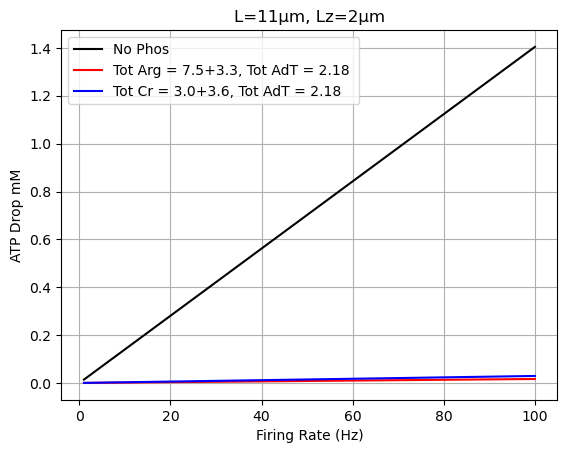

In [25]:
fr_range = np.array([1,10,33,50,80,100])

Drop_NPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )
Drop_APrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 300*beta(0.03) )
Drop_CPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 300*beta(0.03,6.6,2.18,166) )

plt.plot(fr_range,Drop_NPrange,color='black', label='No Phos')
plt.plot(fr_range,Drop_APrange,color='red', label ='Tot Arg = 7.5+3.3, Tot AdT = 2.18 ')
plt.plot(fr_range,Drop_CPrange,color='blue', label ='Tot Cr = 3.0+3.6, Tot AdT = 2.18 ' )
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('ATP Drop mM')
plt.title('L=11µm, Lz=2µm')
plt.legend()
plt.grid()
plt.show()

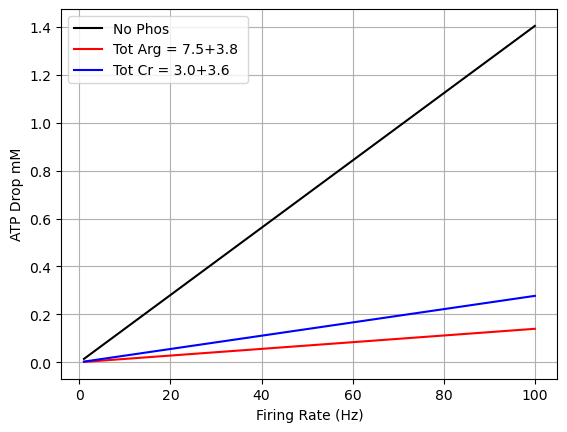

In [26]:
Drop_NPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )
Drop_APrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.3, AdT=3.0) )
Drop_CPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.3,15,3.0,166) )
plt.plot(fr_range,Drop_NPrange,color='black', label='No Phos')
plt.plot(fr_range,Drop_APrange,color='red', label ='Tot Arg = 7.5+3.8 ')
plt.plot(fr_range,Drop_CPrange,color='blue', label ='Tot Cr = 3.0+3.6 ' )
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('ATP Drop mM')
plt.legend()
plt.grid()
plt.show()


In [27]:
Drop_NPrange[-1],Drop_APrange[-1], Drop_CPrange[-1]

(1.4041060162269607, 0.1396634310041553, 0.27720062367091486)

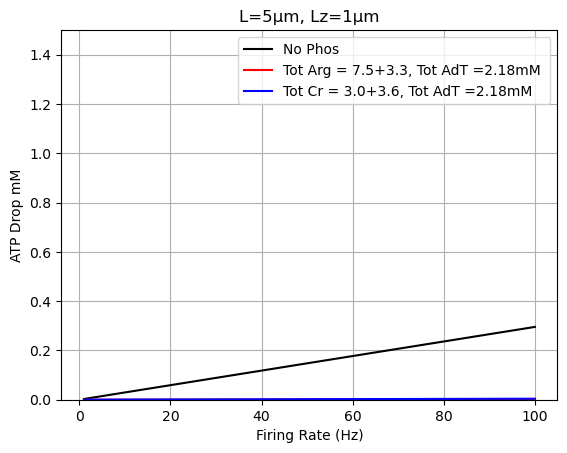

In [28]:
Drop_NPrange = dropNP(5, 1 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )
Drop_APrange = dropNP(5, 1 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.03, AdT=2.18) )
Drop_CPrange = dropNP(5, 1 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.03,6.6,2.18,166) )
plt.plot(fr_range,Drop_NPrange,color='black', label='No Phos')
plt.plot(fr_range,Drop_APrange,color='red', label ='Tot Arg = 7.5+3.3, Tot AdT =2.18mM ')
plt.plot(fr_range,Drop_CPrange,color='blue', label ='Tot Cr = 3.0+3.6, Tot AdT =2.18mM ' )
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('ATP Drop mM')
plt.ylim(0,1.5)
plt.legend()
plt.title('L=5µm, Lz=1µm')
plt.grid()
plt.show()